In [1]:
!pip install --upgrade pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 268 kB 8.2 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 4.7 MB 47.0 MB/s 
     |████████████████████████████████| 690 kB 52.7 MB/s 
     |████████████████████████████████| 102 kB 55.8 MB/s 
     |████████████████████████████████| 9.8 MB 31.8 MB/s 
     |████████████████████████████████| 296 kB 59.8 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=8fea39d733449d029384bb6f99a14bb6e1afcc47b3d6980a9197907a6b006497
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
Successfully built htmlmin
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2
  Attempting uninstall: requests
   

In [67]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


import matplotlib.pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport

from matplotlib import pyplot

In [3]:
forest_df = pd.read_csv('/content/insurance.csv', sep = ',')
forest_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
profile = ProfileReport(forest_df)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
one_hot_df = pd.get_dummies(forest_df, columns=['sex','smoker','region'])
one_hot_df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [18]:
one_hot_df.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [27]:
scaled_features = one_hot_df.copy()

In [28]:
col_names = ['age', 'bmi', 'children']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [29]:
scaled_features[col_names] = features


In [31]:
scaled_features.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,16884.92400,1,0,0,1,0,0,0,1
1,-1.509965,0.509621,-0.078767,1725.55230,0,1,1,0,0,0,1,0
2,-0.797954,0.383307,1.580926,4449.46200,0,1,1,0,0,0,1,0
3,-0.441948,-1.305531,-0.908614,21984.47061,0,1,1,0,0,1,0,0
4,-0.513149,-0.292556,-0.908614,3866.85520,0,1,1,0,0,1,0,0


### Splitting datasets

In [32]:
Y = scaled_features['charges']
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [33]:

X = scaled_features.drop(['charges'], axis = 1)
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,1,0,0,1,0,0,0,1
1,-1.509965,0.509621,-0.078767,0,1,1,0,0,0,1,0
2,-0.797954,0.383307,1.580926,0,1,1,0,0,0,1,0
3,-0.441948,-1.305531,-0.908614,0,1,1,0,0,1,0,0
4,-0.513149,-0.292556,-0.908614,0,1,1,0,0,1,0,0


In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [37]:
X_train.shape

(1070, 11)

## Entrene un primer modelo de regresión lineal sin aplicar ningún tipo de regularización. Evalúe dicho modelo y concluya: i. ¿Es aceptable el error obtenido? ii. ¿Hay evidencia de overfitting?

In [48]:
#regr = LinearRegression()
regr = SGDRegressor(penalty = None)

In [49]:
regr.fit(X_train, Y_train)

SGDRegressor(penalty=None)

In [50]:
preds_train = regr.predict(X_train)
preds_test = regr.predict(X_test)

In [51]:
mean_absolute_error(Y_train, preds_train), mean_absolute_error(Y_test, preds_test)

(4215.673172584117, 4187.706116249929)

In [73]:
importance = regr.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 3571.05325
Feature: 1, Score: 2024.00047
Feature: 2, Score: 509.88932
Feature: 3, Score: 4553.55563
Feature: 4, Score: 4481.97683
Feature: 5, Score: -7283.13734
Feature: 6, Score: 16318.66980
Feature: 7, Score: 2723.13559
Feature: 8, Score: 2331.67079
Feature: 9, Score: 2083.88939
Feature: 10, Score: 1896.83670


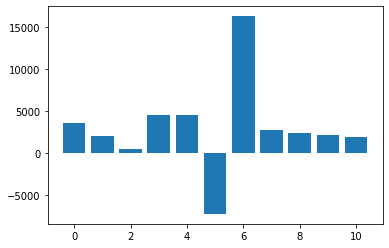

In [74]:
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### RESPUESTA



teniendo encuenta estos datos sobre el costo del seguro: 
Minimum	1121.8739

Maximum	63770.42801

mean ~13270

considero que un error de 4187 dolares (si es que estamso hablando en dolares en el contexto de seguros medicos) no es un error insignificante como en el contexto de finca raíz dónde 4.000 USD puede ser un porcentaje muy bajo. No considero que s este contexto sea overfiting ya que en las pruebas de entrenamineto y las pruebas post entrenamiento dan resultados similares. podría considerar overfiting cuando por ejemplo en las pruebas de entrenamiento me de un error medio de 4.000 dolares y en las pruebas post entrenamiento 10.000 dolares, esto quiere decir que con los datos nuevos no se logra obtener las relaciones apra tener una mejorp predicción y por esono generaliza bien con los datos de prueba. Tambíen podemos observar que el atributo número 6 es una variable de interés para el modelo y la de más importancia, esta variable es amoke_yes. lo que en el contexto de negocio tiene sentido. 

## Aplique una transformación polinomial a los datos de entrada y regularización Ridge o Lasso al modelo de regresión. Pruebe con al menos 2 grados diferentes del polinomio y con al menos 3 valores de alpha para la regularización. Evalúe dichos modelos y concluya: i. ¿Fue posible mejorar el error? ¿Qué hiper-parámetros tiene el modelo que produce el menor error? ii. ¿Qué atributos parecen ser los más importantes para realizar la predicción?

### grado 2

In [42]:
from sklearn.preprocessing import PolynomialFeatures


In [100]:
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)


#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [101]:
poly_reg_model = SGDRegressor(alpha=0.001)
poly_reg_model.fit(X_train_poly, Y_train)

SGDRegressor(alpha=0.001)

In [102]:
preds_train = poly_reg_model.predict(X_train_poly)
preds_test = poly_reg_model.predict(X_test_poly)

In [103]:
mean_absolute_error(Y_train, preds_train), mean_absolute_error(Y_test, preds_test)

(2798.387109710109, 2639.6697711342886)

In [104]:
poly_reg_model.intercept_

array([5049.77388904])

In [79]:
importance = poly_reg_model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 1604.70780
Feature: 1, Score: 2027.32541
Feature: 2, Score: 262.51471
Feature: 3, Score: 2556.50370
Feature: 4, Score: 2456.64446
Feature: 5, Score: -1827.56126
Feature: 6, Score: 6840.70943
Feature: 7, Score: 1487.10756
Feature: 8, Score: 1157.69344
Feature: 9, Score: 1203.11797
Feature: 10, Score: 1165.22920
Feature: 11, Score: 830.68730
Feature: 12, Score: 42.66831
Feature: 13, Score: -142.05241
Feature: 14, Score: 692.61420
Feature: 15, Score: 912.09361
Feature: 16, Score: 793.04225
Feature: 17, Score: 811.66556
Feature: 18, Score: -33.04898
Feature: 19, Score: 275.85494
Feature: 20, Score: 622.28449
Feature: 21, Score: 739.61736
Feature: 22, Score: -246.38235
Feature: 23, Score: 60.98181
Feature: 24, Score: 928.30521
Feature: 25, Score: 1099.02020
Feature: 26, Score: -3346.03581
Feature: 27, Score: 5373.36122
Feature: 28, Score: 885.33754
Feature: 29, Score: 643.24777
Feature: 30, Score: 177.15323
Feature: 31, Score: 321.58687
Feature: 32, Score: -156.92338
Feat

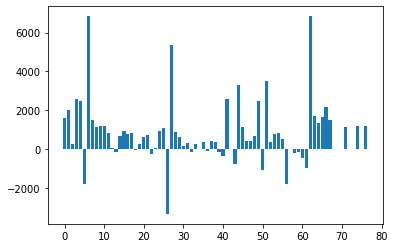

In [80]:
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [81]:
poly_reg_model = SGDRegressor(alpha=0.01)
poly_reg_model.fit(X_train_poly, Y_train)

SGDRegressor(alpha=0.01)

In [82]:
preds_train = poly_reg_model.predict(X_train_poly)
preds_test = poly_reg_model.predict(X_test_poly)

In [83]:
mean_absolute_error(Y_train, preds_train), mean_absolute_error(Y_test, preds_test)

(2773.66748836815, 2613.1213480041765)

In [84]:
importance = poly_reg_model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 1604.04332
Feature: 1, Score: 2032.26218
Feature: 2, Score: 333.47340
Feature: 3, Score: 2319.77972
Feature: 4, Score: 2179.46264
Feature: 5, Score: -2046.45294
Feature: 6, Score: 6545.69529
Feature: 7, Score: 1354.48041
Feature: 8, Score: 1038.66084
Feature: 9, Score: 1043.79799
Feature: 10, Score: 1062.30311
Feature: 11, Score: 784.65431
Feature: 12, Score: 86.53304
Feature: 13, Score: -104.42303
Feature: 14, Score: 692.67813
Feature: 15, Score: 911.36520
Feature: 16, Score: 797.49903
Feature: 17, Score: 806.54430
Feature: 18, Score: -31.78478
Feature: 19, Score: 259.19160
Feature: 20, Score: 642.61211
Feature: 21, Score: 734.02440
Feature: 22, Score: -260.76933
Feature: 23, Score: 76.45027
Feature: 24, Score: 932.30629
Feature: 25, Score: 1099.95589
Feature: 26, Score: -3257.89923
Feature: 27, Score: 5290.16141
Feature: 28, Score: 877.10945
Feature: 29, Score: 659.22067
Feature: 30, Score: 178.19557
Feature: 31, Score: 317.73649
Feature: 32, Score: -149.44165
Feat

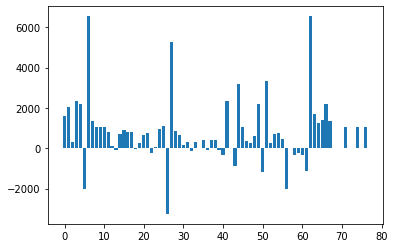

In [85]:
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### grado 4

In [89]:
poly_features = PolynomialFeatures(degree = 4, include_bias = False)
X_train_poly_4 = poly_features.fit_transform(X_train)
X_test_poly_4 = poly_features.fit_transform(X_test)
X_train_poly_4

array([[ 0.48366788, -1.75747362,  0.75107928, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.55486907, -1.04059924, -0.90861367, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.91087502, -0.95201522, -0.90861367, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.33808216, -0.90034121, -0.90861367, ...,  0.        ,
         0.        ,  0.        ],
       [-0.15714284,  2.77835626,  0.75107928, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.12447859, -0.12523104, -0.90861367, ...,  0.        ,
         0.        ,  1.        ]])

In [94]:
poly_reg_model = SGDRegressor(alpha = 1)
poly_reg_model.fit(X_train_poly_4, Y_train)

SGDRegressor(alpha=1)

In [95]:
preds_train = poly_reg_model.predict(X_train_poly_4)
preds_test = poly_reg_model.predict(X_test_poly_4)

In [96]:
mean_absolute_error(Y_train, preds_train), mean_absolute_error(Y_test, preds_test)

(95259103940.68527, 105333736173.20908)

In [99]:
poly_reg_model.intercept_

array([1.90831494e+09])

In [97]:
importance = poly_reg_model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -1936216607.58333
Feature: 1, Score: -2039049119.76796
Feature: 2, Score: 2122691210.09477
Feature: 3, Score: -44118852.76795
Feature: 4, Score: -470873625.19243
Feature: 5, Score: 42017381.66096
Feature: 6, Score: -557009859.62134
Feature: 7, Score: -740890581.69175
Feature: 8, Score: 584116581.78840
Feature: 9, Score: -102629223.03176
Feature: 10, Score: -255589255.02527
Feature: 11, Score: 1153963174.39767
Feature: 12, Score: -1913407965.65234
Feature: 13, Score: -2732002103.05775
Feature: 14, Score: -1126203261.12204
Feature: 15, Score: -810013346.46129
Feature: 16, Score: -854957672.06784
Feature: 17, Score: -1081258935.51549
Feature: 18, Score: -257125554.49421
Feature: 19, Score: 28949154.45437
Feature: 20, Score: -789848642.77127
Feature: 21, Score: -918191564.77222
Feature: 22, Score: -4306030225.92072
Feature: 23, Score: -2490255189.45215
Feature: 24, Score: -394557047.05889
Feature: 25, Score: -1644492072.70908
Feature: 26, Score: -1835564221.21451
Feature

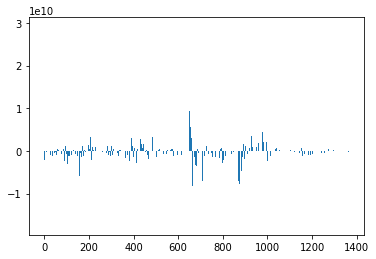

In [98]:
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## RESPUESTA

Los resultados mejoraron considerablemente con alpha=0.01 en una regresión lineal de grado 2 con una reducción casi de 2.000 doalres en las predicciones. estos son los parametros default que se usaron:

oss='squared_error', *, penalty='l2', l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, random_state=None, learning_rate='invscaling', eta0=0.01, power_t=0.25, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, warm_start=False, average=False

con el modelo de grado 4 los resultados fueron mucho peor que en los otros casos.

igual que en la primera pregunta, si el cliente es o no es fumador se considera un atributo de alto interés para el modelo.


